In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

data_dir = Path("/content/drive/MyDrive/ADA_Judiciary")

In [3]:
cases_cleaned = pd.read_csv(data_dir / "cases" / "cases_cleaned.csv")

In [4]:
judges = pd.read_csv(data_dir / "judges" / "judges.csv")
judge_case_merge_key = pd.read_csv(data_dir / "keys" / "judge_case_merge_key.csv")

In [5]:
print('Number of records in cleaned cases file for 2018: ' + str(len(cases_cleaned)))
cases_cleaned.head()

Number of records in cleaned cases file for 2018: 13724299


,ddl_case_id,judge_position,female_defendant,female_petitioner,type_name,date_of_filing,date_first_list,case_duration_days,days_to_first_list,court_details,state_district
0,01-01-01-201900000012018,chief judicial magistrate,0,0,1943,2018-01-01,2018-01-01,37.0,0.0,1-1-1,1-1
1,01-01-01-201900000022018,chief judicial magistrate,0,0,1943,2018-01-01,2018-01-01,31.0,0.0,1-1-1,1-1
2,01-01-01-201900000032018,chief judicial magistrate,0,0,1943,2018-01-01,2018-01-01,31.0,0.0,1-1-1,1-1
3,01-01-01-201900000042018,chief judicial magistrate,0,0,1943,2018-01-01,2018-01-01,31.0,0.0,1-1-1,1-1
4,01-01-01-201900000052018,chief judicial magistrate,-1,0,1943,2018-01-01,2018-01-01,8.0,0.0,1-1-1,1-1


In [6]:
cases_cleaned.dtypes

,0
ddl_case_id,object
judge_position,object
female_defendant,int64
female_petitioner,int64
type_name,int64
date_of_filing,object
date_first_list,object
case_duration_days,float64
days_to_first_list,float64
court_details,object


In [7]:
judge_case_merge_key.head()

,ddl_case_id,ddl_filing_judge_id,ddl_decision_judge_id
0,01-01-01-201900000022018,5.0,5.0
1,01-01-01-201900000032017,5.0,5.0
2,01-01-01-201900000032018,94.0,94.0
3,01-01-01-201900000042016,3.0,5.0
4,01-01-01-201900000042018,156.0,156.0


In [8]:
judges.head()

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
0,1,1,1,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014
1,2,1,1,1,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014
2,3,1,1,1,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016
3,4,1,1,1,chief judicial magistrate,0 nonfemale,01-06-2016,06-06-2016
4,5,1,1,1,chief judicial magistrate,0 nonfemale,06-06-2016,07-07-2018


In [9]:
def clean_judge_position(pos):
    pos = str(pos).lower()

    if any(x in pos for x in ['magistrate', 'jmfc', 'sub-judge', 'small cause court', 'taluka court', 'sub court', 'munsiff', 'munsif']):
        return 'magistrate'
    elif any(x in pos for x in ['civil judge', 'district judge', 'civil court', 'additional district', 'principal civil', 'junior division', 'senior division']):
        return 'district_civil_judge'
    elif any(x in pos for x in ['sessions court', 'district and sessions', 'additional district and sessions', 'principal district and sessions', 'criminal cases']):
        return 'sessions_court'
    elif any(x in pos for x in ['metropolitan', 'chief metropolitan']):
        return 'metropolitan_court'
    elif 'juvenile' in pos:
        return 'juvenile_court'
    elif 'family' in pos:
        return 'family_court'
    elif any(x in pos for x in ['special court', 'spl court', 'spl judge', 'special judges', 'special excise']):
        return 'special_court'
    elif any(x in pos for x in ['fast track court', 'ftc', 'ftc-1', 'ftc-2', 'ftc i', 'ftc ii', 'ftc judges', 'ftc judges']):
        return 'fast_track_court'
    elif 'motor' in pos or 'accident' in pos or 'mac' in pos:
        return 'motor_accident_court'
    elif any(x in pos for x in ['industrial', 'labour']):
        return 'industrial_labour_court'
    elif 'cooperative' in pos:
        return 'cooperative_court'
    elif 'tribunal' in pos:
        return 'tribunal'
    elif 'cbi court' in pos:
        return 'cbi_court'
    elif 'vacation' in pos:
        return 'vacation'
    else:
        return 'other'

# Apply to the judges table
judges['judge_category'] = judges['judge_position'].apply(clean_judge_position)

In [10]:
judges.head()

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date,judge_category
0,1,1,1,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014,magistrate
1,2,1,1,1,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014,magistrate
2,3,1,1,1,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016,magistrate
3,4,1,1,1,chief judicial magistrate,0 nonfemale,01-06-2016,06-06-2016,magistrate
4,5,1,1,1,chief judicial magistrate,0 nonfemale,06-06-2016,07-07-2018,magistrate


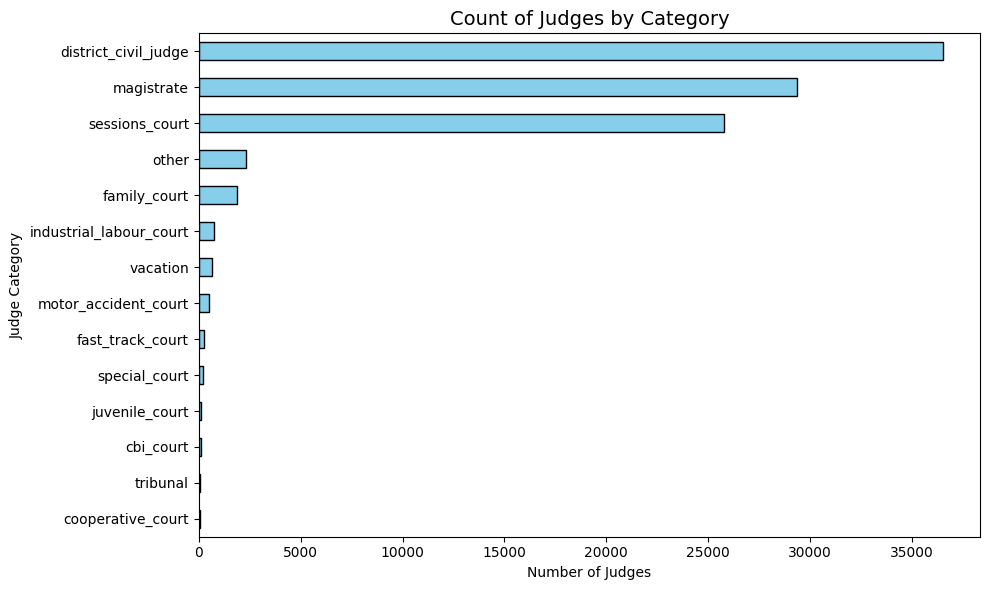

In [11]:
plt.figure(figsize=(10,6))
judges['judge_category'].value_counts().sort_values().plot(
    kind='barh', color='skyblue', edgecolor='black'
)
plt.title('Count of Judges by Category', fontsize=14)
plt.xlabel('Number of Judges')
plt.ylabel('Judge Category')
plt.tight_layout()
plt.show()

In [12]:
# Merge filing judge category
judge_case_merge_key = judge_case_merge_key.merge(
    judges[['ddl_judge_id', 'judge_category']],
    how='left',
    left_on='ddl_filing_judge_id',
    right_on='ddl_judge_id'
).rename(columns={'judge_category': 'filing_judge_category'})

# Merge decision judge category
judge_case_merge_key = judge_case_merge_key.merge(
    judges[['ddl_judge_id', 'judge_category']],
    how='left',
    left_on='ddl_decision_judge_id',
    right_on='ddl_judge_id'
).rename(columns={'judge_category': 'decision_judge_category'})

# Drop redundant columns
judge_case_merge_key = judge_case_merge_key.drop(columns=['ddl_judge_id_x', 'ddl_judge_id_y'])

# Check the result
judge_case_merge_key.head()

,ddl_case_id,ddl_filing_judge_id,ddl_decision_judge_id,filing_judge_category,decision_judge_category
0,01-01-01-201900000022018,5.0,5.0,magistrate,magistrate
1,01-01-01-201900000032017,5.0,5.0,magistrate,magistrate
2,01-01-01-201900000032018,94.0,94.0,magistrate,magistrate
3,01-01-01-201900000042016,3.0,5.0,magistrate,magistrate
4,01-01-01-201900000042018,156.0,156.0,magistrate,magistrate


In [13]:
# Merge the case table with judge-case mapping
cases_merged = cases_cleaned.merge(
    judge_case_merge_key[['ddl_case_id', 'filing_judge_category', 'decision_judge_category']],
    how='left',
    on='ddl_case_id'
)

# Check the merged result
print(cases_merged.columns)
cases_merged.head()


Index(['ddl_case_id', 'judge_position', 'female_defendant',
       'female_petitioner', 'type_name', 'date_of_filing', 'date_first_list',
       'case_duration_days', 'days_to_first_list', 'court_details',
       'state_district', 'filing_judge_category', 'decision_judge_category'],
      dtype='object')


,ddl_case_id,judge_position,female_defendant,female_petitioner,type_name,date_of_filing,date_first_list,case_duration_days,days_to_first_list,court_details,state_district,filing_judge_category,decision_judge_category
0,01-01-01-201900000012018,chief judicial magistrate,0,0,1943,2018-01-01,2018-01-01,37.0,0.0,1-1-1,1-1,NaN,NaN
1,01-01-01-201900000022018,chief judicial magistrate,0,0,1943,2018-01-01,2018-01-01,31.0,0.0,1-1-1,1-1,magistrate,magistrate
2,01-01-01-201900000032018,chief judicial magistrate,0,0,1943,2018-01-01,2018-01-01,31.0,0.0,1-1-1,1-1,magistrate,magistrate
3,01-01-01-201900000042018,chief judicial magistrate,0,0,1943,2018-01-01,2018-01-01,31.0,0.0,1-1-1,1-1,magistrate,magistrate
4,01-01-01-201900000052018,chief judicial magistrate,-1,0,1943,2018-01-01,2018-01-01,8.0,0.0,1-1-1,1-1,magistrate,magistrate


In [14]:
missing_values = cases_merged.isna().sum()
total_rows = cases_merged.shape[0]
# print column names and number of missing values
for col, num_missing in missing_values.items():
    percent_missing = round(num_missing/total_rows*100)
    print(f"Column '{col}' has {num_missing} missing values which is {percent_missing}% of total")

Column 'ddl_case_id' has 0 missing values which is 0% of total
Column 'judge_position' has 0 missing values which is 0% of total
Column 'female_defendant' has 0 missing values which is 0% of total
Column 'female_petitioner' has 0 missing values which is 0% of total
Column 'type_name' has 0 missing values which is 0% of total
Column 'date_of_filing' has 0 missing values which is 0% of total
Column 'date_first_list' has 747460 missing values which is 5% of total
Column 'case_duration_days' has 6421003 missing values which is 47% of total
Column 'days_to_first_list' has 747460 missing values which is 5% of total
Column 'court_details' has 0 missing values which is 0% of total
Column 'state_district' has 0 missing values which is 0% of total
Column 'filing_judge_category' has 10848976 missing values which is 79% of total
Column 'decision_judge_category' has 10901478 missing values which is 79% of total


In [15]:
def map_judge_position(pos):
    pos = str(pos).lower()

    # Sessions / Criminal Judges
    if any(x in pos for x in ['district and sessions', 'sessions court', 'criminal cases']):
        return 'sessions_court'

    # Civil Judges
    elif any(x in pos for x in ['civil court', 'civil judge', 'district munsiff', 'junior division', 'senior division', 'principal civil judge']):
        return 'district_civil_judge'

    # Sub Courts / Taluka Courts / Outlying Courts
    elif any(x in pos for x in ['taluka court', 'sub court', 'outlying court']):
        return 'sub_court'

    # Magistrates
    elif any(x in pos for x in ['judicial magistrate', 'jmfc', 'chief judicial magistrate', 'metropolitan magistrate', 'magistrate']):
        return 'magistrate'

    # Family Courts
    elif 'family court' in pos:
        return 'family_court'

    # Motor Accident Claims Tribunal
    elif any(x in pos for x in ['motor accident', 'mact', 'm.a.c.t']):
        return 'motor_accident_court'

    # Industrial / Labour Courts
    elif any(x in pos for x in ['industrial court', 'labour court']):
        return 'industrial_labour_court'

    # Special Courts
    elif any(x in pos for x in ['special court', 'special magistrate', 'nia', 'pocso', 'prevention of corruption', 'economic offences']):
        return 'special_court'

    # Juvenile Courts
    elif 'juvenile court' in pos or 'juvenile board' in pos:
        return 'juvenile_court'

    # CBI / Investigation Courts
    elif 'cbi' in pos:
        return 'cbi_court'

    # Tribunals
    elif 'tribunal' in pos:
        return 'tribunal'

    # Vacation / temporary / administrative
    elif 'vacation' in pos:
        return 'vacation'

    # Cooperative Courts
    elif 'co-operative court' in pos or 'cooperative court' in pos:
        return 'cooperative_court'

    # Railway Courts
    elif 'railway' in pos:
        return 'railway_court'

    # Fast Track Courts
    elif 'fast track' in pos:
        return 'fast_track_court'

    else:
        return 'other'

# Apply mapping
cases_merged['judge_category'] = cases_merged['judge_position'].apply(map_judge_position)

# Check distribution
print(cases_merged['judge_category'].value_counts())


judge_category
magistrate                 5366426
sessions_court             3856361
district_civil_judge       2780656
other                       827703
family_court                373611
sub_court                   307521
railway_court                69576
motor_accident_court         59288
industrial_labour_court      47288
special_court                14833
fast_track_court              6897
juvenile_court                5012
cooperative_court             4278
tribunal                      3436
vacation                      1186
cbi_court                      227
Name: count, dtype: int64


In [16]:
# Mapping of judge_position to judge_category_clean
position_to_category = {
    'additional district judge': 'district_civil_judge',
    '2-additional district judge': 'district_civil_judge',
    '3-additional district judge': 'district_civil_judge',
    '4-additional district judge': 'district_civil_judge',
    '5-additional district judge': 'district_civil_judge',
    '6-additional district judge': 'district_civil_judge',
    '7-additional district judge': 'district_civil_judge',
    'additional court': 'district_civil_judge',
    'principal district judge': 'district_civil_judge',
    'district and sessional judge div.': 'district_civil_judge',
    'munsiff first class court': 'sub_court',
    'district munsiff first class': 'sub_court',
    'munsiff': 'sub_court',
    'sub court': 'sub_court',
    'taluka court': 'sub_court',
    'small cause court': 'sub_court',
    'junior division': 'district_civil_judge',
    'city civil and sessions court': 'district_civil_judge',
    'fast track court': 'fast_track_court',
    'motor accidents claims tribunal': 'motor_accident_court',
    'industrial court': 'industrial_labour_court',
    'labour court': 'industrial_labour_court',
    'co-operative court aurangabad': 'cooperative_court',
    'cooperative court': 'cooperative_court',
    'co-operative appellate court aurangabad': 'cooperative_court',
    'co-operative court nashik.': 'cooperative_court',
    'co-operative court, solapur': 'cooperative_court',
    'co-operative court nanded': 'cooperative_court',
    'co-operative court amravati': 'cooperative_court',
    'co-operative court raigad-ratnagiri at alibaug': 'cooperative_court',
    'co-operative court raigad-ratnagiri at ratnagiri': 'cooperative_court',
    'maharashtra state co-operative appellate court': 'cooperative_court',
    'co-operative appellate court, pune': 'cooperative_court',
    'co-operative trial court, pune': 'cooperative_court',
    'co-operative court, ahmednagar': 'cooperative_court',
    'co-operative court thane': 'cooperative_court',
    'co-operative court, shrirampur': 'cooperative_court',
    'the district co-operative court, satara': 'cooperative_court',
    'family court': 'family_court',
    'school tribunal': 'tribunal',
    'additional school tribunal': 'tribunal',
    'special magistrate court': 'special_court',
    'cbi court': 'cbi_court',
    'vacation': 'vacation',
    'pocso': 'special_court',
    'judicial commissioner ranchi': 'other',
    'judicial courts complex nahan, sirmaur, h.p.': 'other',
    'bagaha': 'district_civil_judge',
    'ahmedabad_metro court': 'district_civil_judge',
    'mmtc ii': 'special_court',
    'mmtc iii': 'special_court',
    'mmtc iv': 'special_court',
    'mmtc vi': 'special_court',
    'psmedkgp': 'special_court',
    'bwndcis': 'special_court'
}
cases_merged['judge_category'] = cases_merged.apply(
    lambda row: position_to_category.get(row['judge_position'], row['judge_category']),
    axis=1
)

In [17]:
# Check distribution
print(cases_merged['judge_category'].value_counts())

judge_category
magistrate                 5365250
sessions_court             3775314
district_civil_judge       3174542
sub_court                   464187
family_court                373611
other                       297139
special_court                76018
railway_court                69576
motor_accident_court         59288
industrial_labour_court      47288
fast_track_court              6897
cooperative_court             5328
juvenile_court                5012
tribunal                      3436
vacation                      1186
cbi_court                      227
Name: count, dtype: int64


In [18]:
cases_merged[cases_merged['judge_category'] == 'other']['judge_position'].value_counts().head(20)

,count
judge_position,
sc st,13691
judicial commissioner ranchi,9208
"judicial courts complex nahan, sirmaur, h.p.",9048
"j.m establishment, chatra, jharkhand",7919
"judicial courts complex paonta sahib, sirmaur,h.p.",7835
mmtc v,7744
polc and poit,7699
principal munsiff,7626
"motor vehicle court, nagpur.",7040


In [19]:
cases_merged.head()

,ddl_case_id,judge_position,female_defendant,female_petitioner,type_name,date_of_filing,date_first_list,case_duration_days,days_to_first_list,court_details,state_district,filing_judge_category,decision_judge_category,judge_category
0,01-01-01-201900000012018,chief judicial magistrate,0,0,1943,2018-01-01,2018-01-01,37.0,0.0,1-1-1,1-1,NaN,NaN,magistrate
1,01-01-01-201900000022018,chief judicial magistrate,0,0,1943,2018-01-01,2018-01-01,31.0,0.0,1-1-1,1-1,magistrate,magistrate,magistrate
2,01-01-01-201900000032018,chief judicial magistrate,0,0,1943,2018-01-01,2018-01-01,31.0,0.0,1-1-1,1-1,magistrate,magistrate,magistrate
3,01-01-01-201900000042018,chief judicial magistrate,0,0,1943,2018-01-01,2018-01-01,31.0,0.0,1-1-1,1-1,magistrate,magistrate,magistrate
4,01-01-01-201900000052018,chief judicial magistrate,-1,0,1943,2018-01-01,2018-01-01,8.0,0.0,1-1-1,1-1,magistrate,magistrate,magistrate


In [20]:
# Select the relevant columns
cols_to_check = ['ddl_case_id', 'judge_position', 'female_defendant',
                 'female_petitioner', 'type_name', 'date_of_filing',
                 'date_first_list', 'case_duration_days', 'court_details',
                 'state_district', 'filing_judge_category', 'decision_judge_category', 'judge_category']

# Check for missing values
missing_values = cases_merged[cols_to_check].isnull().sum().sort_values(ascending=False)

# Show missing value counts
print(missing_values)

decision_judge_category    10901478
filing_judge_category      10848976
case_duration_days          6421003
date_first_list              747460
ddl_case_id                       0
type_name                         0
female_petitioner                 0
female_defendant                  0
judge_position                    0
court_details                     0
date_of_filing                    0
state_district                    0
judge_category                    0
dtype: int64


In [21]:
# List of columns to fill
cols_to_fill = ['decision_judge_category', 'filing_judge_category']

# Fill missing values with -1
cases_merged[cols_to_fill] = cases_merged[cols_to_fill].fillna(-1)

# Verify
print(cases_merged[cols_to_fill].isnull().sum())

decision_judge_category    0
filing_judge_category      0
dtype: int64


In [22]:
columns_to_drop = ['ddl_case_id', 'filing_judge_category', 'decision_judge_category', 'judge_position']

# Create a copy of the dataframe and start preparing the same for prediction modelling
cases_cleaned_judges = cases_merged.drop(columns=columns_to_drop, axis=1)

In [23]:
cases_cleaned_judges.head()

,female_defendant,female_petitioner,type_name,date_of_filing,date_first_list,case_duration_days,days_to_first_list,court_details,state_district,judge_category
0,0,0,1943,2018-01-01,2018-01-01,37.0,0.0,1-1-1,1-1,magistrate
1,0,0,1943,2018-01-01,2018-01-01,31.0,0.0,1-1-1,1-1,magistrate
2,0,0,1943,2018-01-01,2018-01-01,31.0,0.0,1-1-1,1-1,magistrate
3,0,0,1943,2018-01-01,2018-01-01,31.0,0.0,1-1-1,1-1,magistrate
4,-1,0,1943,2018-01-01,2018-01-01,8.0,0.0,1-1-1,1-1,magistrate


In [24]:
cases_cleaned_judges.dtypes

,0
female_defendant,int64
female_petitioner,int64
type_name,int64
date_of_filing,object
date_first_list,object
case_duration_days,float64
days_to_first_list,float64
court_details,object
state_district,object
judge_category,object


In [25]:
cases_cleaned_judges.to_csv(data_dir / "cases" / "cases_cleaned_judges.csv", index=False)